# Document Alignment

This notebook will teach you about:
* ORB
* Discriptor Matcher
* Perspective Transform
* Homography

You will learn to perform document alignment using the above techniques.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
imRef = cv2.imread('inputs/ref.png', cv2.IMREAD_COLOR)

In [3]:
im = cv2.imread('inputs/img.png', cv2.IMREAD_COLOR)

Detect Features

In [4]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [5]:
# Convert images to grayscale.
im1Gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im2Gray = cv2.cvtColor(imRef, cv2.COLOR_BGR2GRAY)

In [6]:
# Detect ORB features and compute descriptors.
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

Match Features

In [7]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

# Draw top matches
imMatches = cv2.drawMatches(im, keypoints1, imRef, keypoints2, matches, None)
cv2.imwrite("outputs/matchesORB.jpg", imMatches)

True

In [8]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

In [9]:
# Use homography
height, width, channels = imRef.shape
im1Reg = cv2.warpPerspective(im, h, (width, height))
cv2.imwrite("outputs/alignedORB.jpg", im1Reg)

True

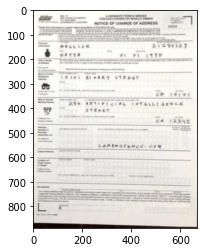

In [10]:
plt.imshow(im1Reg[:,:,::-1])
plt.show()